            ILI_rate
Week                
2004-01-04     23.95
2004-01-11     14.87
2004-01-18      9.21
2004-01-25      6.04
2004-02-01      9.59


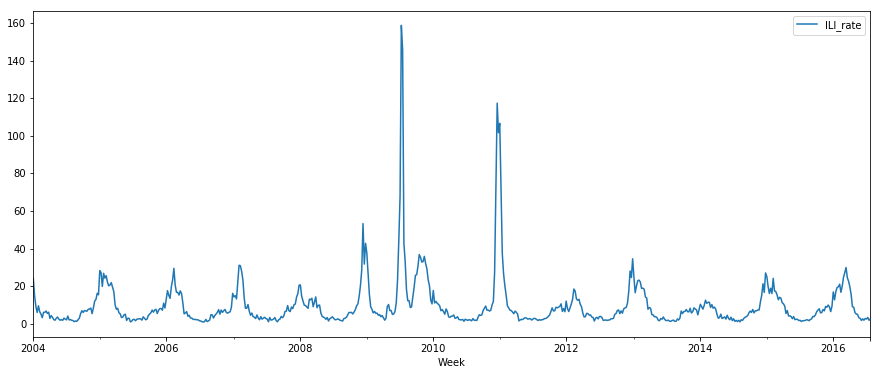

In [1]:
from pandas import read_csv
import pandas as pd
from pandas import datetime
import matplotlib.pylab as plt
from matplotlib import pyplot
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import read_csv
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from matplotlib.pylab import rcParams
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib.mlab as mlab
#from scipy import stats 
#import seaborn as sns
rcParams['figure.figsize'] = 15, 6
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
series = pd.read_csv('ILI_ENGLAND.csv', parse_dates=['Week'], index_col='Week',date_parser=dateparse)

plt.figure(figsize=(8,5))
print(series.head())
series.plot()
pyplot.show()

In [2]:
X = series.values
size = len(X)
year = 52

In [3]:
L5=series.index[size - year:size]
L4=series.index[size - year*2:size - year]
L3=series.index[size - year*3:size - year*2]
L2=series.index[size - year*4:size - year*3]
L1=series.index[size - year*5:size - year*4]
L=series.index[size - year*6:size - year*5]

2015-2016

In [4]:
import numpy as np
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm




/Users/freya/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [20]:
train5, test5 = X[0:size-52], X[size-52:size]
history5 = [x for x in train5]
predictions5 = list()
for t in range(len(test5)):
    #model5 = ARIMA(history5, order=(3,1,1))
    model5 = sm.tsa.SARIMAX(endog = history5, order=(1,1,1), seasonal_order=(1, 0, 1, 0))
    model_fit5 = model5.fit(disp=-1)
    output5 = model_fit5.forecast()
    yhat5 = output5[0]
    predictions5.append(yhat5)
    obs5 = test5[t]
    history5.append(obs5)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error5 = mean_squared_error(test5, predictions5)

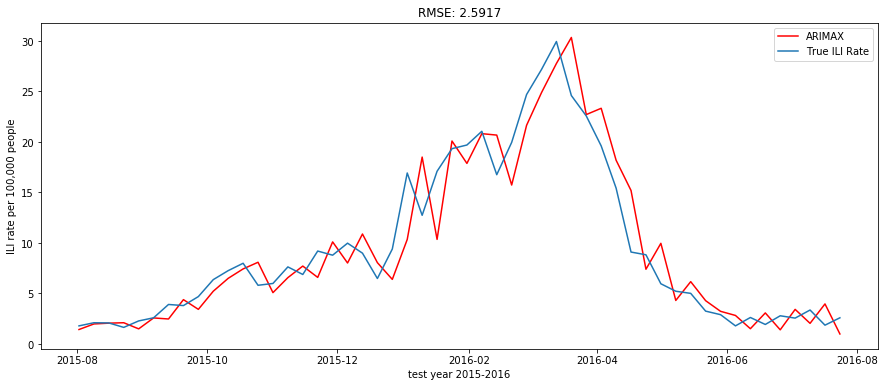

In [21]:
predictions5 = pd.DataFrame(predictions5,index=L5,columns=['predictive_rate'])
df5 = pd.DataFrame(data=test5, index=L5,columns=["real ILI rate"])


line_up5, = plt.plot(predictions5, label='ARIMAX',color='red')
line_down5, = plt.plot(df5, label='True ILI Rate')
plt.legend(handles=[line_up5, line_down5])
plt.ylabel("ILI rate per 100,000 people")
plt.xlabel("test year 2015-2016")
error5 = mean_squared_error(test5, predictions5)
rmse = np.sqrt(error5)
#plt.title('MAE: %.4f'% MAE )
plt.title('RMSE: %.4f'% rmse )
plt.show()

2014-2015

In [7]:
train4, test4 = X[0:size-year*2], X[size-year*2:size-year]
history4 = [x for x in train4]
predictions4 = list()
for t in range(len(test4)):
    model4 = sm.tsa.SARIMAX(endog = history4, order=(1,1,1))
    model_fit4 = model4.fit(disp=0)
    output4 = model_fit4.forecast()
    yhat4 = output4[0]
    predictions4.append(yhat4)
    obs4 = test4[t]
    history4.append(obs4)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error4 = mean_squared_error(test4, predictions4)
predictions4 = pd.DataFrame(predictions4,index=L4,columns=['predictive_rate'])


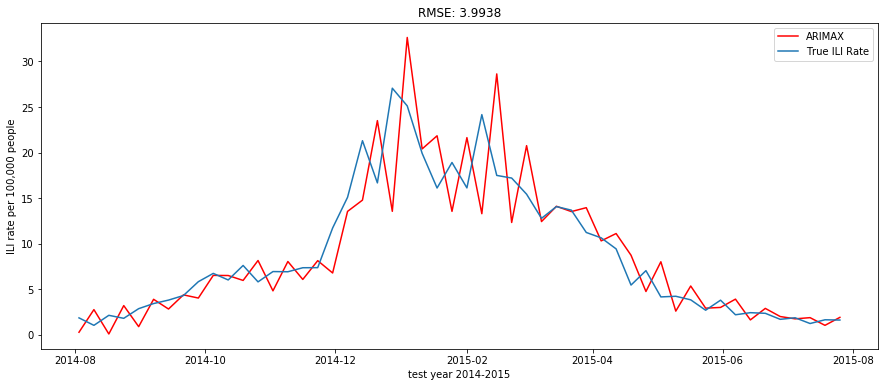

In [8]:
predictions4 = pd.DataFrame(predictions4,index=L4,columns=['predictive_rate'])
df4 = pd.DataFrame(data=test4, index=L4,columns=["real ILI rate"])


line_up4, = plt.plot(predictions4, label='ARIMAX',color='red')
line_down4, = plt.plot(df4, label='True ILI Rate')
plt.legend(handles=[line_up4, line_down4])
plt.ylabel("ILI rate per 100,000 people")
plt.xlabel("test year 2014-2015")
rmse = np.sqrt(error4)
#plt.title('MAE: %.4f'% MAE )
plt.title('RMSE: %.4f'% rmse )
plt.show()

2013-2014

In [9]:
train3, test3 = X[0:size-year*3], X[size-year*3:size-year*2]
history3 = [x for x in train3]
predictions3 = list()
for t in range(len(test3)):
    model3 = sm.tsa.SARIMAX(endog = history3, order=(1,1,1))
    model_fit3 = model3.fit(disp=0)
    output3 = model_fit3.forecast()
    yhat3 = output3[0]
    predictions3.append(yhat3)
    obs3 = test3[t]
    history3.append(obs3)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error3 = mean_squared_error(test3, predictions3)

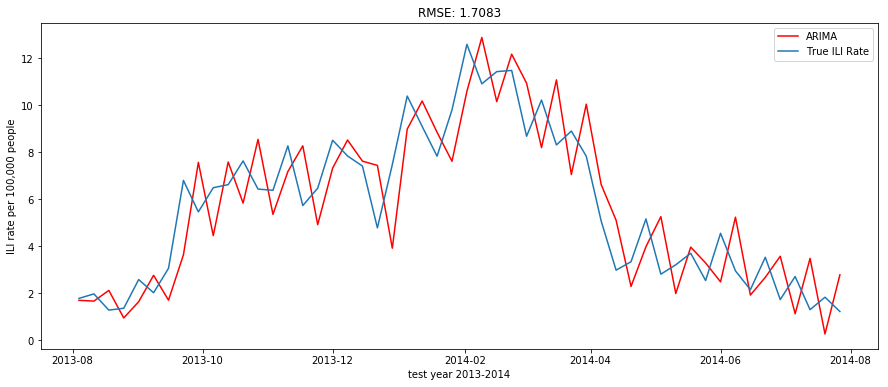

In [10]:
predictions3 = pd.DataFrame(predictions3,index=L3,columns=['predictive_rate'])
df3 = pd.DataFrame(data=test3, index=L3,columns=["real ILI rate"])


line_up3, = plt.plot(predictions3, label='ARIMA',color='red')
line_down3, = plt.plot(df3, label='True ILI Rate')
plt.legend(handles=[line_up3, line_down3])
plt.ylabel("ILI rate per 100,000 people")
plt.xlabel("test year 2013-2014")
rmse = np.sqrt(error3)
#plt.title('MAE: %.4f'% MAE )
plt.title('RMSE: %.4f'% rmse )
pyplot.show()

2012-2013

In [11]:
train2, test2 = X[0:size-year*4], X[size-year*4:size-year*3]
history2 = [x for x in train2]
predictions2 = list()
for t in range(len(test2)):
    model2 = sm.tsa.SARIMAX(endog = history2, order=(10,1,1))
    model_fit2 = model2.fit(disp=0)
    output2 = model_fit2.forecast()
    yhat2 = output2[0]
    predictions2.append(yhat2)
    obs2 = test2[t]
    history2.append(obs2)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error2 = mean_squared_error(test2, predictions2)

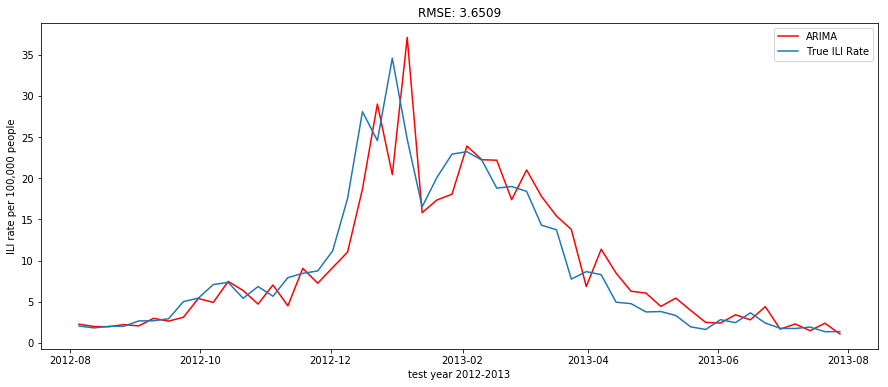

In [12]:
predictions2 = pd.DataFrame(predictions2,index=L2,columns=['predictive_rate'])
df2 = pd.DataFrame(data=test2, index=L2,columns=["real ILI rate"])


line_up2, = plt.plot(predictions2, label='ARIMA',color='red')
line_down2, = plt.plot(df2, label='True ILI Rate')
plt.legend(handles=[line_up2, line_down2])
plt.ylabel("ILI rate per 100,000 people")
plt.xlabel("test year 2012-2013")
rmse = np.sqrt(error2)
#plt.title('MAE: %.4f'% MAE )
plt.title('RMSE: %.4f'% rmse )
pyplot.show()